In [63]:
import pandas as pd                               #Load datasets
import numpy as np
from sklearn.preprocessing import StandardScaler  #Standardization
from sklearn.decomposition import PCA             #PCA function
from sklearn.cluster import DBSCAN                #DBSCAN function
from sklearn.neighbors import NearestNeighbors    #KNN function
import matplotlib.pyplot as plt                   #Plot outputs

In [64]:
#Load CSV file
Wine_df_input = pd.read_csv("wine.csv",header=0)

#Exclude Wine Class from data input
Wine_df = Wine_df_input.iloc[:, 1:]

Wine_df.head(10)

,Alcohol,MalicAcid,Ash,Alcalinity,Magnesium,TotalPhenols,Flavanoids,Nonflavanoids,Proanthocyanins,ColorIntensity,Hue,OD280/OD315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


*Run PCA Algorithm to get around 80% variance explained*

In [65]:
# Reduce dimension using PCA

#Standardize dataframe
Wine_df = StandardScaler().fit_transform(Wine_df)

#Run the PCA algorithm
pca = PCA(n_components=5)

principalComponents = pca.fit_transform(Wine_df)
Wine_df = pd.DataFrame(data = principalComponents,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

#Total variance % emplained by components
#print("% variance explained by PC1 + PC2:", round(((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])/ 1)*100,2))
print("% variance explained by PC1 + PC2 + PC3 + PC4 + PC5:", round(((pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2] + pca.explained_variance_ratio_[3] + pca.explained_variance_ratio_[4])/ 1)*100,2))

% variance explained by PC1 + PC2 + PC3 + PC4 + PC5: 80.16


In [66]:
Wine_df

,PC1,PC2,PC3,PC4,PC5
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,-1.031151,0.982819,0.724902,-0.251033
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842
4,1.008908,-0.869831,2.026688,-0.409766,0.298458
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164
174,-2.601956,-1.757229,0.207581,0.349496,0.255063
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955


*Run DBSCAN Algorithm*

In [67]:
# Review the value of epsilon after KNN distance elbow plot
clustering = DBSCAN(eps=2, min_samples=14).fit(Wine_df)
DBSCAN_dataset = Wine_df.copy()
DBSCAN_dataset.loc[:,'Cluster'] = clustering.labels_ 

# Number of cluster created
DBSCAN_dataset['Cluster'].unique()

array([ 0, -1,  1], dtype=int64)

In [68]:
len(DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1])

19

*Plot the clusters along the N principal components*

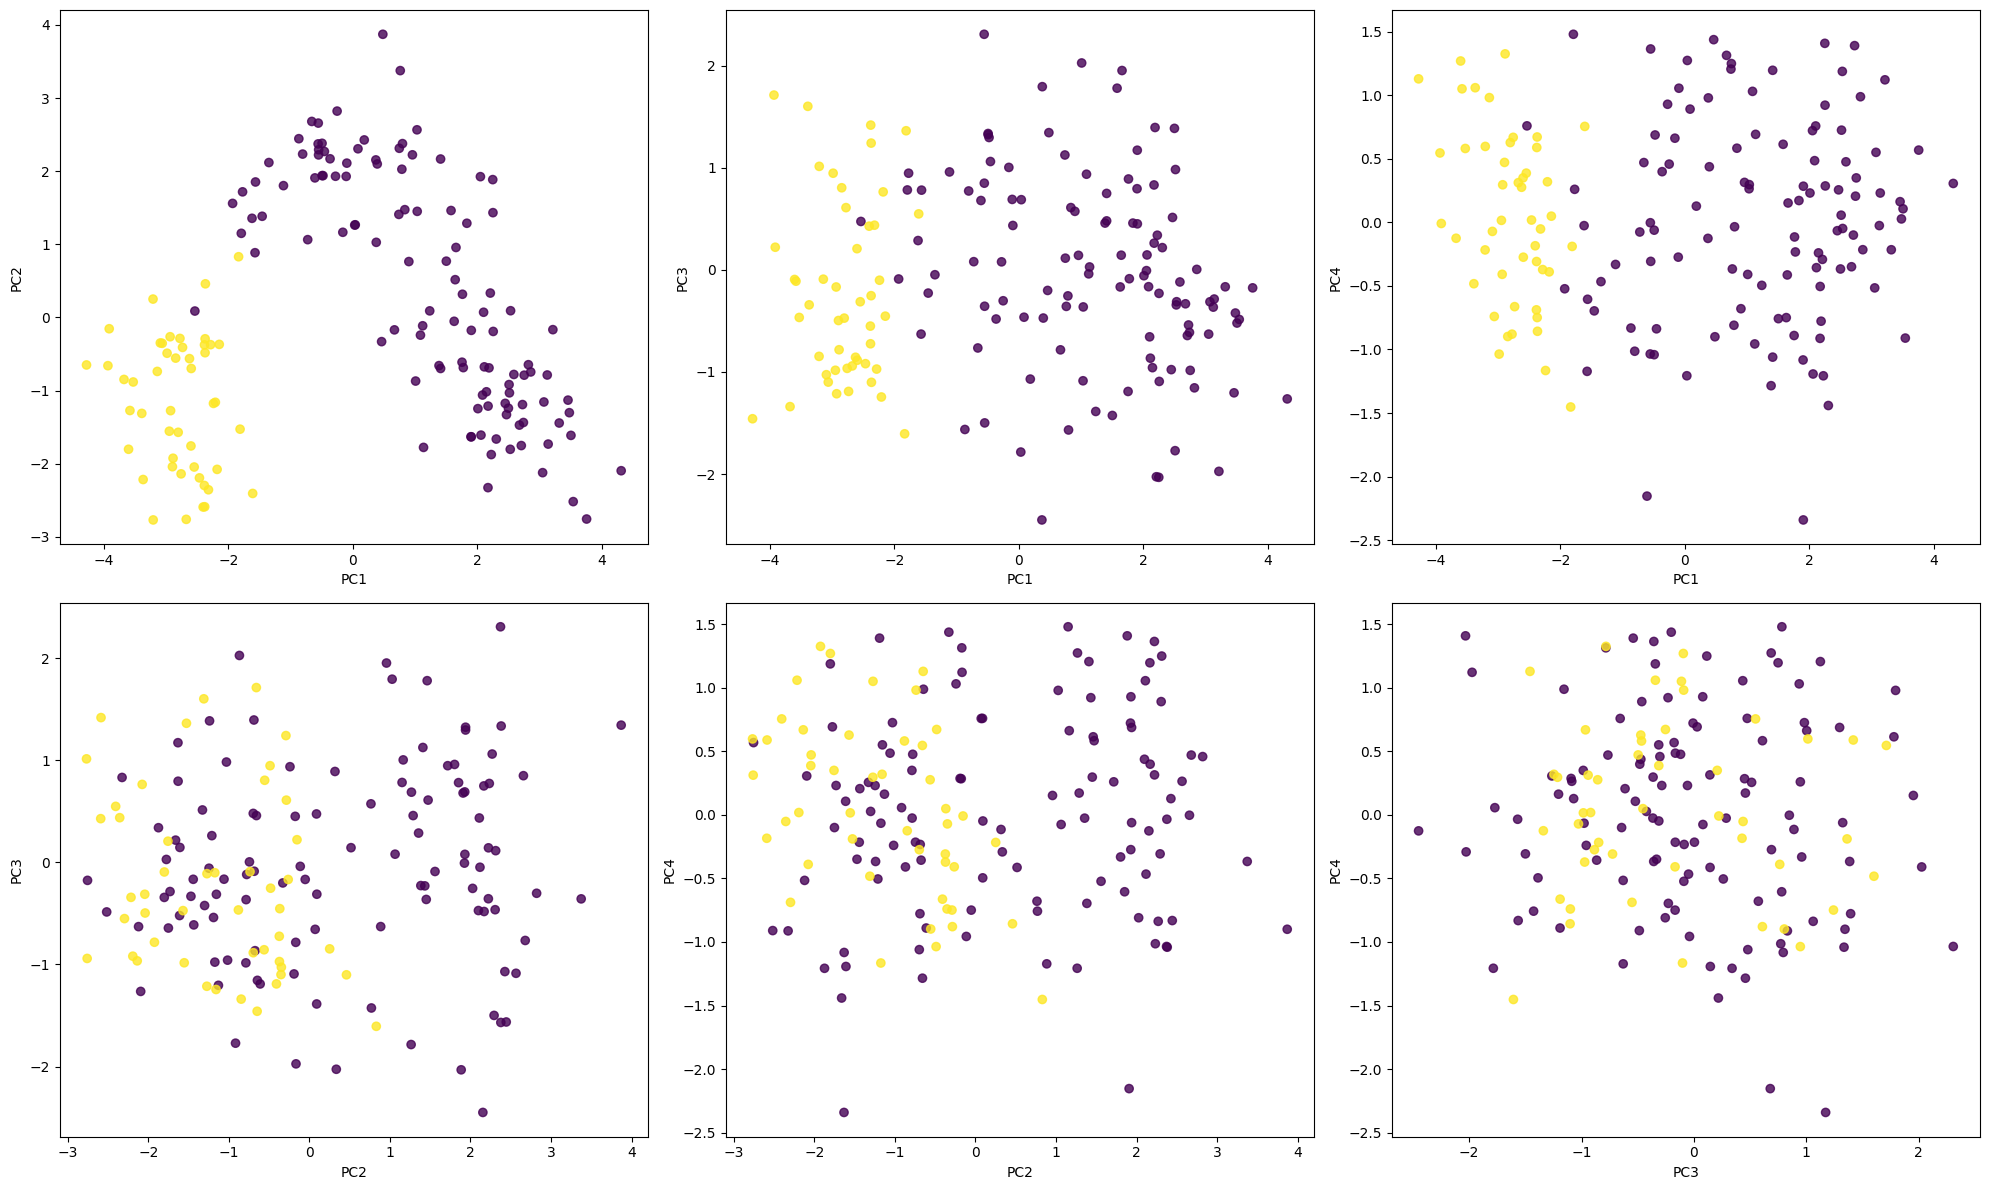

In [69]:
# Plot the non outlier  clusters
label0 = DBSCAN_dataset[DBSCAN_dataset['Cluster'] != -1]

#fig, ax = plt.subplots()
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,12))

ax1.scatter(label0['PC1'], label0['PC2'], c = label0['Cluster'], alpha=.80)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')

ax2.scatter(label0['PC1'], label0['PC3'], c = label0['Cluster'], alpha=.80)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')

ax3.scatter(label0['PC1'], label0['PC4'], c = label0['Cluster'], alpha=.80)
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC4')

ax4.scatter(label0['PC2'], label0['PC3'], c = label0['Cluster'], alpha=.80)
ax4.set_xlabel('PC2')
ax4.set_ylabel('PC3')

ax5.scatter(label0['PC2'], label0['PC4'], c = label0['Cluster'], alpha=.80)
ax5.set_xlabel('PC2')
ax5.set_ylabel('PC4')

ax6.scatter(label0['PC3'], label0['PC4'], c = label0['Cluster'], alpha=.80)
ax6.set_xlabel('PC3')
ax6.set_ylabel('PC4')



    
#ax.grid(True)
fig.tight_layout()

plt.show()

In [70]:
# Browse the outlier cluster (cluster = -1)
DBSCAN_dataset[DBSCAN_dataset['Cluster'] == -1]

,PC1,PC2,PC3,PC4,PC5,Cluster
25,0.990079,-0.940667,3.820908,-1.321561,0.159005,-1
59,-0.928582,3.073486,-4.585064,-1.051844,0.457124,-1
60,-1.542480,1.381444,-0.874683,-2.890120,-0.978008,-1
68,-0.812805,0.220514,-0.707005,-2.488990,-0.583560,-1
69,1.975620,1.403283,-1.238276,-1.152306,4.186657,-1
73,2.562227,-0.260199,3.374394,-0.979399,1.980799,-1
78,1.262931,0.770850,-1.184225,-0.925882,2.613593,-1
95,2.543865,-0.169274,0.788697,-1.032837,3.731079,-1
96,-0.543953,0.368927,1.308896,-1.277999,3.346791,-1
110,1.420569,1.418207,0.139276,3.430539,2.196884,-1


*Calculating the correct value for Epsilon*

In [71]:
# Calculate KNN distances
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(Wine_df)
distances, indices = neighbors_fit.kneighbors(Wine_df)

# Sort the datapoints in ascending order
distances = np.sort(distances, axis=0)
distances = distances[:,1]

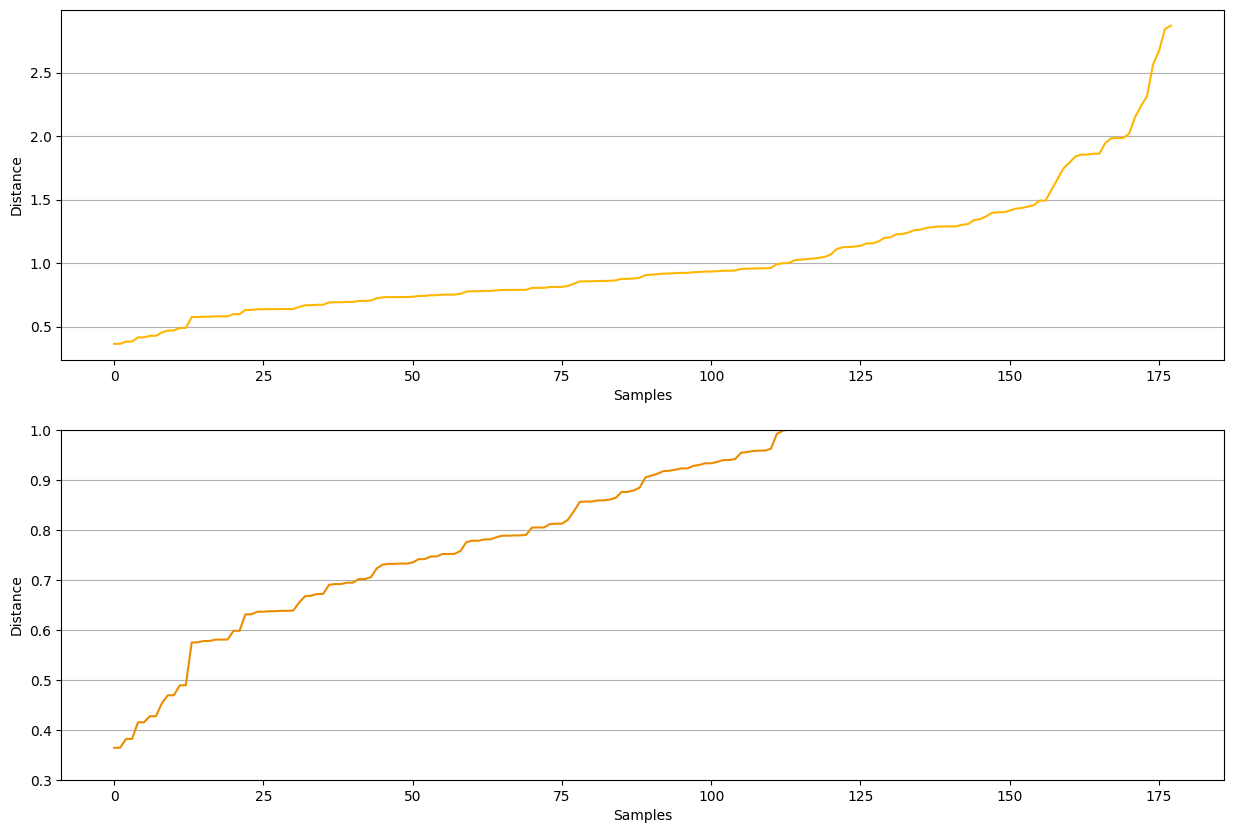

In [74]:
# Plot the points in order of ascending distances
fig, ax = plt.subplots(2, figsize = (15,10))

ax[0].plot(distances,'#FFB600')
ax[0].set_xlabel('Samples') 
ax[0].set_ylabel('Distance') 
ax[0].grid(axis='y')


ax[1].plot(distances, '#EB8C00')
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Distance')
ax[1].grid(axis='y')
ax[1].set_ylim([0.3,1])

plt.show()